# Flood - Preprocess - Remove Flood Events
<h3> 
Aaron Trefler <br/>
JPL <br/>
Created: 06/29/2016 <br/>
</h3>

# I. Setup

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import scipy.io as sio 

from flood_functions import plot_grace_feature_histogram
from IPython.display import display, HTML
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap

In [3]:
%pylab inline
# %matplotlib

Populating the interactive namespace from numpy and matplotlib


In [4]:
# define directories
dir_flood = '../../Raw Data/Flood Observatory/'
dir_python_data = '../Data/'
dir_grace = '../../Work_Matlab/Data/'
dir_figures = '../Figures/'

# II. Load Data

## Flood Observatory

In [7]:
# name of preprocessed flood dataframe
df_name = 'df_flood'

In [10]:
# FO data previously cleaned by FloodObservatory_Preprocess.py
df = pd.read_csv(dir_python_data + df_name + '.csv')
df = df.drop('Unnamed: 0', axis=1)
df.head(1)

,Register #,Began,Date Began,Ended,Duration in Days,Dead,Displaced,Main cause,Severity *,Affected sq km,Magnitude (M)**,Country,Other,Centroid X,Centroid Y
0,4356.0,8-May-16,08-May-16,11-May-16,4.0,0.0,0.0,Heavy Rain,1.0,197079.53,5.9,China,0,112.952,24.7532


In [11]:
shape(df_flood_grace)

(2445, 15)

# III. Remove Floods

## (1) Main Cause

In [69]:
# write out Main Causes, along with their frequencies to main_causes.text

file = open(str(dir_flood + "main_cuases.txt"), "w")

s_main_causes = pd.Series(pd.unique(df['Main cause'].ravel()))
file.write("Number of Unique Main Cause Descriptors: " + str(len(s_main_causes)) + "\n")
file.write("Number of Floods: " + str(len(df)) + "\n\n")

for i in range(len(s_main_causes)):
    file.write(
        str(i) + ' ' +\
        str(s_main_causes[i]) + ' ' +\
        str(sum(s_main_causes.str.contains(main_causes[i], case=False))) +\
        '\n'
    )
    
file.close()

In [11]:
# count/list total number of "Main Cause" strings with "snow" included
df_snow = df[df['Main cause'].str.contains("snow", case=False)]
print 'Number of Main Cause Descriptors with "snow":', \
    len(pd.unique(df_snow['Main cause'].ravel())), '\n'
print pd.unique(df_snow['Main cause'].ravel())

Number of Main Cause Descriptors with "snow": 12 

['Snowmelt and Ice Jams' 'Snowmelt' 'Heavy Rain and Snowmelt'
 'Dam Break, Snowmelt, Heavy Rain' 'Heavy Rain and Snow'
 'Heavy Rain Snowmelt Dam B' 'snowmelt' 'Snowmelt and Heavy Rain'
 'Rain and snowmelt' 'Snow Melt' 'Rain and Snow Melt' 'Rain and snow']


In [34]:
df = df_snow
df_snow.shape

(77, 41)

## (2) Locations of "snow" Floods

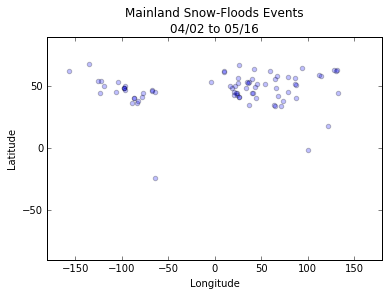

In [13]:
# frequency of "snow" floods across the world
x = df['Centroid X']
y = df['Centroid Y']

plt.scatter(x, y, alpha=0.25)
plt.title('Mainland Snow-Floods Events\n04/02 to 05/16')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim((-180, 180))
plt.ylim((-90, 90))
plt.show()

## (3) GRACE LWE for Snow Flood Events

### (4a) Numerical Features (un-ranked)

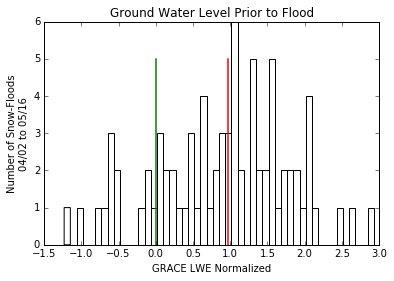

In [27]:
plot_grace_feature_histogram('GRACE LWE Normalized', df['GRACE lwe norm'],
                            ylabel='Number of Snow-Floods\n04/02 to 05/16')

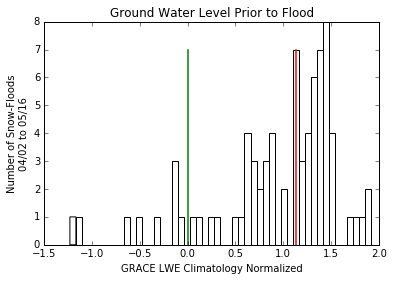

In [28]:
plot_grace_feature_histogram('GRACE LWE Climatology Normalized', df['GRACE lwe clim norm'],
                             ylabel='Number of Snow-Floods\n04/02 to 05/16')

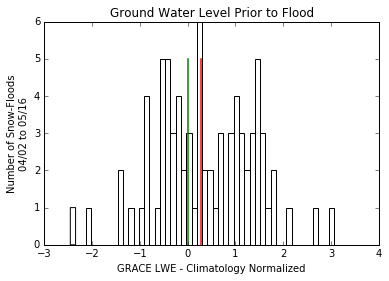

In [29]:
plot_grace_feature_histogram('GRACE LWE - Climatology Normalized', df['GRACE lwe noClim norm'],
                             ylabel='Number of Snow-Floods\n04/02 to 05/16')

### (4b) Ordinal Features (ranked)

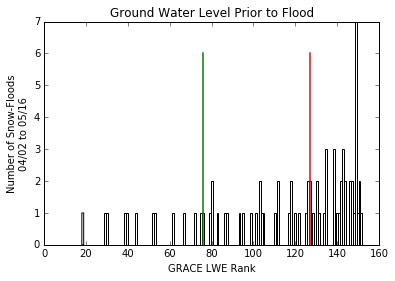

In [31]:
plot_grace_feature_histogram('GRACE LWE Rank', df['GRACE lwe rank'],\
                              ylabel='Number of Snow-Floods\n04/02 to 05/16',\
                              num_bins=152, middle_value=76)

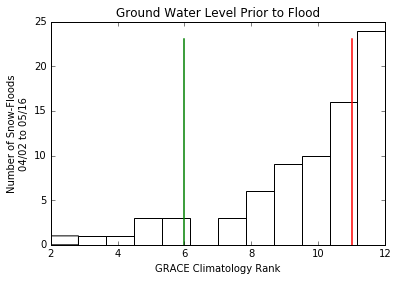

In [32]:
plot_grace_feature_histogram('GRACE Climatology Rank', df['GRACE lwe clim rank'], 
                              ylabel='Number of Snow-Floods\n04/02 to 05/16',\
                              num_bins=12, middle_value=6)

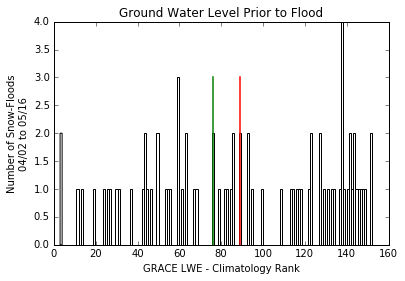

In [33]:
plot_grace_feature_histogram('GRACE LWE - Climatology Rank', df['GRACE lwe noClim rank'],\
                              ylabel='Number of Snow-Floods\n04/02 to 05/16',\
                              num_bins=152, middle_value=76)